# Latent Consistency Models

推論処理を大幅に高速化する拡散モデル。高解像度の画像を生成するために、非常に少ない推論ステップで画像を生成することができる．
- ドキュメント:https://huggingface.co/docs/diffusers/main/en/api/pipelines/latent_consistency_models

<a href="https://colab.research.google.com/github/fuyu-quant/data-science-wiki/blob/main/multimodal/text_to_image/latent_consistency_models.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%%capture
!pip install diffusers
!pip install transformers

In [ ]:
import torch
from diffusers import DiffusionPipeline

### Latent Consistency Modelsのダウンロード

In [1]:
pipe = DiffusionPipeline.from_pretrained("SimianLuo/LCM_Dreamshaper_v7", torch_dtype=torch.float32)
pipe.to(torch_device="cuda", torch_dtype=torch.float32)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_utils.py:749: FutureWarning: `torch_dtype` is deprecated and will be removed in version 0.25.0. 
  deprecate("torch_dtype", "0.25.0", "")
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_utils.py:752: FutureWarning: `torch_device` is deprecated and will be removed in version 0.25.0. 
  deprecate("torch_device", "0.25.0", "")


  0%|          | 0/4 [00:00<?, ?it/s]

In [15]:
prompt = "Urban cityscape, photo style,8K，sunset,Detailed image"

### 画像の生成

In [16]:
# 1~50ステップに設定可能。LCMは<= 4ステップでも高速推論をサポートします。推奨： 1~8ステップ
num_inference_steps = 8

images = pipe(prompt=prompt, num_inference_steps=num_inference_steps, guidance_scale=8.0).images

  0%|          | 0/8 [00:00<?, ?it/s]

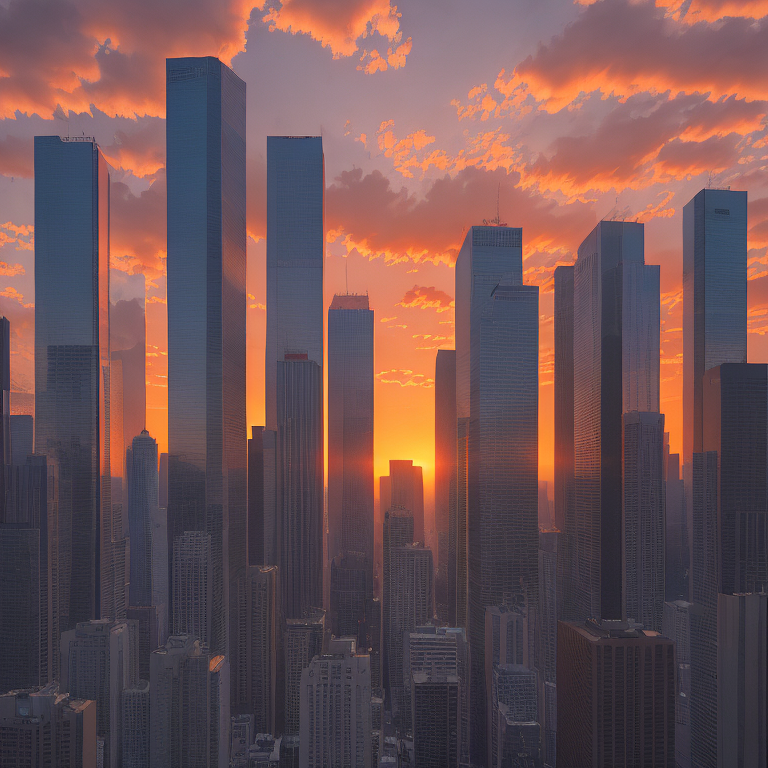

In [17]:
images[0]